In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
path_to_pictures = '/content/drive/MyDrive/pic/'
path_to_dataset = '/content/drive/MyDrive/Colab Notebooks/CVNLP/dataset_faces.csv'

# Import libraries and Modules

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from keras_preprocessing.image import load_img

In [24]:
import warnings
warnings.filterwarnings("ignore")

# Import data

In [25]:
df = pd.read_csv(path_to_dataset)

In [26]:
df.head()

,filename,age,gender,ethnicity
0,100_1_0_20170110183726390.jpg,100,1,0
1,100_1_2_20170105174847679.jpg,100,1,2
2,100_1_2_20170110182836729.jpg,100,1,2
3,101_1_2_20170105174739309.jpg,101,1,2
4,10_0_0_20161220222308131.jpg,10,0,0


In [27]:
# map labels
gender_dict = {0: 'Male', 1: 'Female'}
ethnicity_dict = {}

# Explore Data

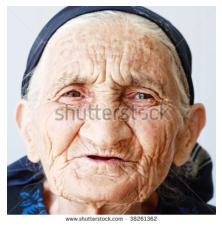

In [28]:
# Explore first picture
from PIL import Image
img = Image.open(path_to_pictures + df['filename'][0])
plt.axis('off')
plt.imshow(img)

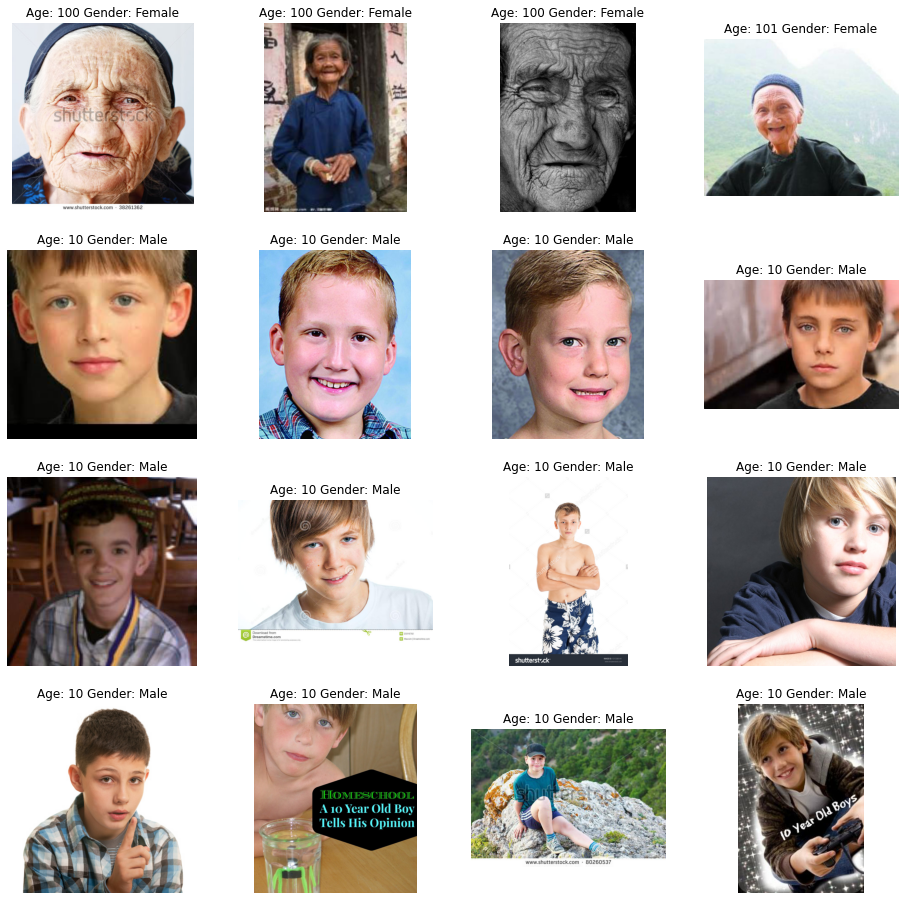

In [29]:
files = df.iloc[0:16]
plt.figure(figsize=(16,16))

for index, file, age, gender, ethnicity in files.itertuples():
    plt.subplot(4, 4, index + 1) # index starts from 1, not 0
    img = load_img(path_to_pictures + file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[int(gender)]}")
    plt.axis('off')

## Explore distributions

### Age distribution

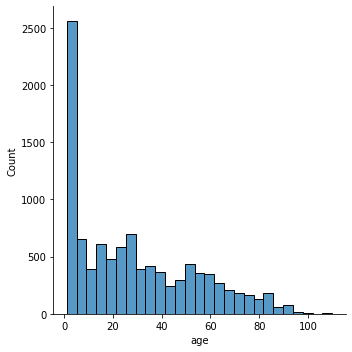

In [30]:
sns.displot(df['age'])

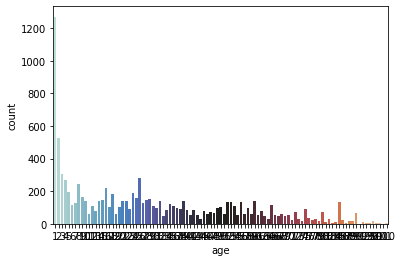

In [31]:
# try with countplot:
sns.countplot(df['age'], palette='icefire')

### Gender Distribution

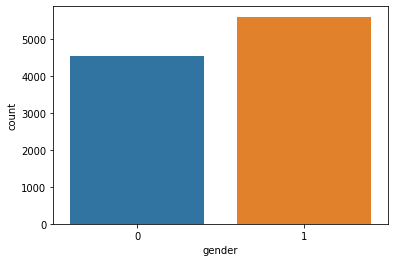

In [32]:
sns.countplot(df['gender'])

### Ethnicity distribution

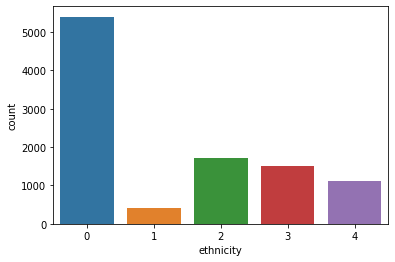

In [33]:
sns.countplot(df['ethnicity'])

## Explore Images Size

As we can see below, the pictures have different sizes. For some algorithms, it might be beneficial that the images are all the same size. In the next Jupyter Notebook the images will be resized, but to get an idea of which size could be appropriate, we will explore the image sizing in this notebook. 

It was not possible to calculate the average number of pixels considering all the photographs because the computer ran out of RAM. Therefore, we iterate through 2000 random selected pictures (k=2000) and calculate the average number of pixels for those 2000 pictures.  

In [38]:
import random
images = []
pixels_in_x_axis = []
pixels_in_y_axis = []

for idx, image in enumerate(random.sample(list(df['filename']), k=2000)):
  path = path_to_pictures + image
  img = Image.open(path)
  img = np.array(img)
  images.append(img)
  pixels_in_x_axis.append(img.shape[0])
  pixels_in_y_axis.append(img.shape[1])
  if(idx < 10): # Show the size of the first 10 pictures
    print(f"Image {idx} has shape {img.shape}")

Image 0 has shape (547, 370, 3)
Image 1 has shape (360, 640, 3)
Image 2 has shape (2500, 1750, 3)
Image 3 has shape (720, 448, 3)
Image 4 has shape (1505, 750, 3)
Image 5 has shape (2228, 1600, 3)
Image 6 has shape (389, 522, 3)
Image 7 has shape (677, 1016, 3)
Image 8 has shape (553, 368, 3)
Image 9 has shape (359, 564, 3)


In [39]:
pixels_in_x_axis = pd.Series(pixels_in_x_axis)
pixels_in_y_axis = pd.Series(pixels_in_y_axis)

print(f"Mean size for pictures is ({pixels_in_x_axis.mean()} , {pixels_in_y_axis.mean()})")
print(f"Smaller size for x is {pixels_in_x_axis.min()} pixel and for y {pixels_in_y_axis.min()} pixels.")

Mean size for pictures is (555.527 , 531.247)
Smaller size for x is 69 and for y 89
